In [1]:
import pandas as pd    
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns 
        

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


- QUESTION 5. PART A -  How many rows and columns are in gdp_df? see below

In [5]:
gdp_df.shape

(7176, 4)

- QUESTION 5. PART B -What are the data types of each column?  see below

In [6]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB
None


- QUESTION 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'. See below

In [7]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [8]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value' : 'GDP_Per_Capita'})

In [9]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [10]:
# Start of question 7, determining max number of reports a country can have and whether each country has that max number
country_count = gdp_df.groupby('Country').count()


In [11]:
country_count.max()


Year              31
GDP_Per_Capita    31
dtype: int64

In [12]:
country_count == country_count.max()

,Year,GDP_Per_Capita
Country,,
Afghanistan,False,False
Africa Eastern and Southern,True,True
Africa Western and Central,True,True
Albania,True,True
Algeria,True,True
...,...,...
Vietnam,True,True
West Bank and Gaza,False,False
World,True,True


- QUESTION 7. PART A -  How many countries have data for all years? see below

In [13]:
countries_with_data = (country_count == country_count.max()).sum()
print("Number of countries with data:", countries_with_data[0])

Number of countries with data: 205


In [14]:
# start of 7 B to determine list of countries that dont have max numebr of report
countries_missing_data = country_count.query ('Year < 31' )



In [15]:
countries_missing_data = countries_missing_data.reset_index()


- QUESTION 7. PART B -Which countries are missing many years of data? See below

In [16]:
countries_missing_data['Country']

0                   Afghanistan
1        Bosnia and Herzegovina
2                      Cambodia
3                        Canada
4                Cayman Islands
5                       Croatia
6                      CuraÃ§ao
7                      Djibouti
8                       Estonia
9                       Hungary
10                      Iceland
11                       Israel
12                       Kosovo
13                       Kuwait
14                       Latvia
15                      Liberia
16                        Libya
17                    Lithuania
18                     Maldives
19                      Moldova
20                   Montenegro
21                        Nauru
22           Other small states
23                        Palau
24                        Qatar
25                   San Marino
26                       Serbia
27    Sint Maarten (Dutch part)
28              Slovak Republic
29                     Slovenia
30                 Small states
31      

- QUESTION 7. PART C - Look at the number of observations per year. What do you notice? There was an increase in the number of observations per year each passing year. Many of the countries that are missing data are msall countries where it might be hard to collect data for various reasons. see below

In [17]:
year_count = gdp_df.groupby('Year').count()
year_count

,Country,GDP_Per_Capita
Year,,
1990,206,206
1991,207,207
1992,208,208
1993,209,209
1994,211,211
1995,222,222
1996,222,222
1997,226,226
1998,226,226


In [18]:
# Created a new dataframe  to be used for visualizations
gdp2020 = gdp_df.query('Year == 2020')
gdp2020.reset_index(drop=True)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Africa Eastern and Southern,2020,3491.978104
2,Africa Western and Central,2020,4021.293919
3,Albania,2020,13253.733337
4,Algeria,2020,10735.382539
...,...,...,...
235,Vietnam,2020,10338.270543
236,West Bank and Gaza,2020,5402.538773
237,World,2020,16269.969854
238,Zambia,2020,3277.816510


Text(0.5, 0, 'GDP Per Capita')

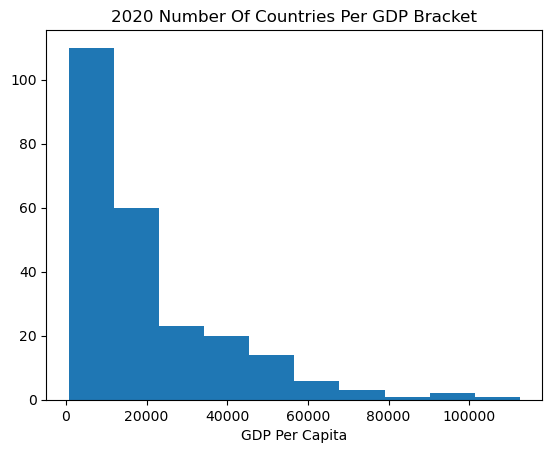

In [19]:
plt.hist(gdp2020.GDP_Per_Capita)
plt.title('2020 Number Of Countries Per GDP Bracket')
plt.xlabel('GDP Per Capita')

Text(0.5, 0, 'GDP Per Capita')

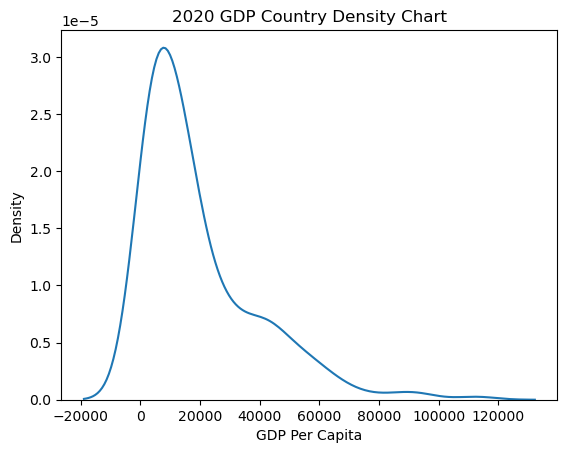

In [20]:
sns.kdeplot(gdp2020.GDP_Per_Capita)
plt.title('2020 GDP Country Density Chart')
plt.xlabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

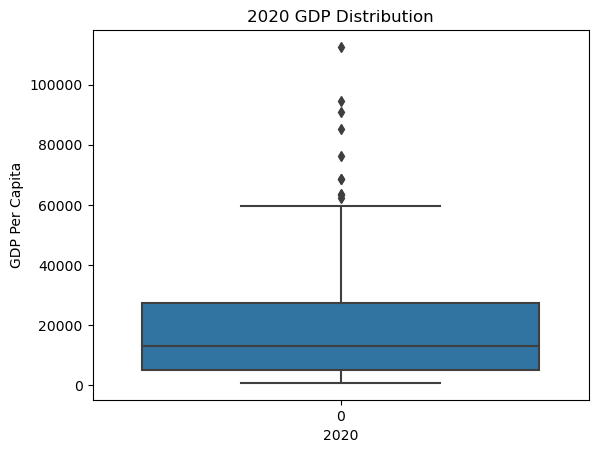

In [21]:
sns.boxplot(gdp2020.GDP_Per_Capita)
plt.title('2020 GDP Distribution')
plt.xlabel('2020')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

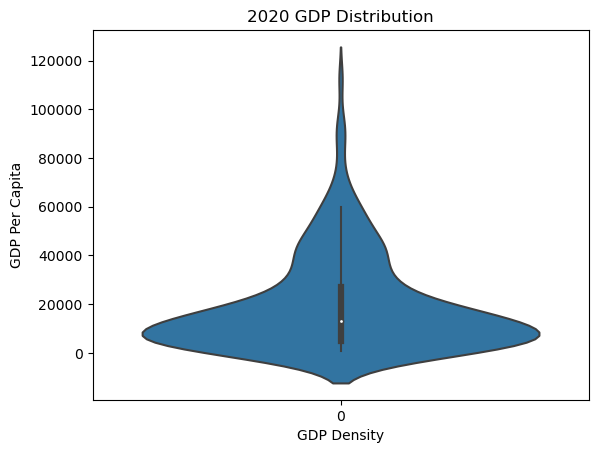

In [22]:
sns.violinplot(gdp2020.GDP_Per_Capita)
plt.title('2020 GDP Distribution')
plt.xlabel('GDP Density')
plt.ylabel('GDP Per Capita')

- QUESTION 8 - What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
- The main thing I notice when looking at these charts it that there are signficantly more countries reporting low GDP. The higher the GDP amount is, the fewer countries report that amount in a year, this would indicate there is not an equall distrubtion of wealth among countries in the world. The charts are all effective at communicating that disparty in GDP between countries. Some of the charts, such as the density chart, shows what the desnity is for each gdp point. other charts like the box and violin chart are effective at showing what the average is as well is how each country compares to the average. 

- QUESTION 9 -  What was the median GDP per capita value in 2020? See below

In [23]:
gdp2020.GDP_Per_Capita.median()

12908.9374056206

In [24]:
#filter by year 
#Creating a new dataframe  to be used in decades charts
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]


In [25]:
# sorted by country name then year
gdp_decades = gdp_decades.sort_values(by=['Country', 'Year'], ascending=[True, True])
gdp_decades

,Country,Year,GDP_Per_Capita
10,Afghanistan,2010,1957.029070
0,Afghanistan,2020,1970.560169
49,Africa Eastern and Southern,1990,3083.976800
39,Africa Eastern and Southern,2000,2915.472987
29,Africa Eastern and Southern,2010,3545.205203
...,...,...,...
7114,Zambia,2020,3277.816510
7175,Zimbabwe,1990,2652.129209
7165,Zimbabwe,2000,2771.060576
7155,Zimbabwe,2010,1813.531764


Text(0, 0.5, 'GDP Per Capita')

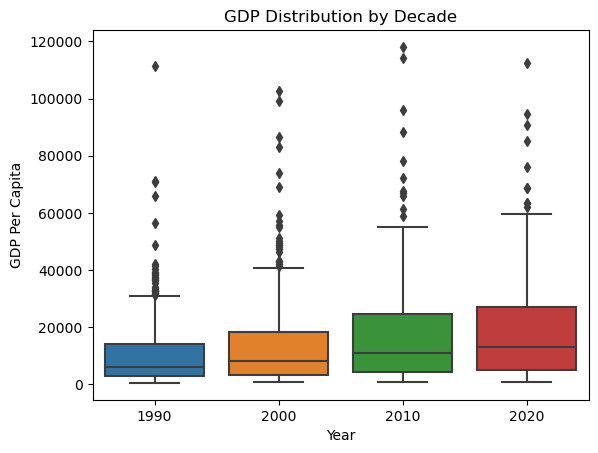

In [26]:
sns.boxplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita)
plt.title('GDP Distribution by Decade')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

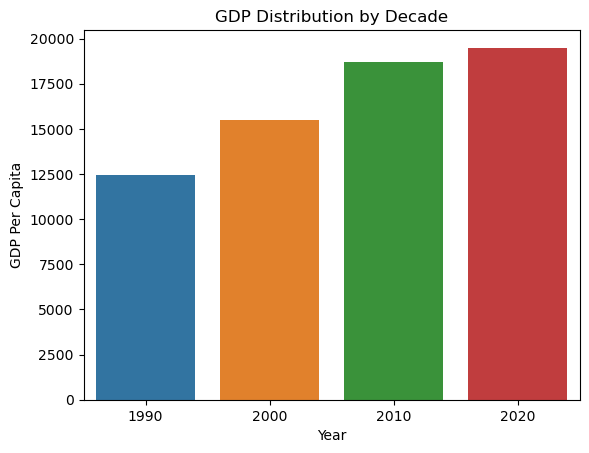

In [27]:
sns.barplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita, errorbar=None)
plt.title('GDP Distribution by Decade')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

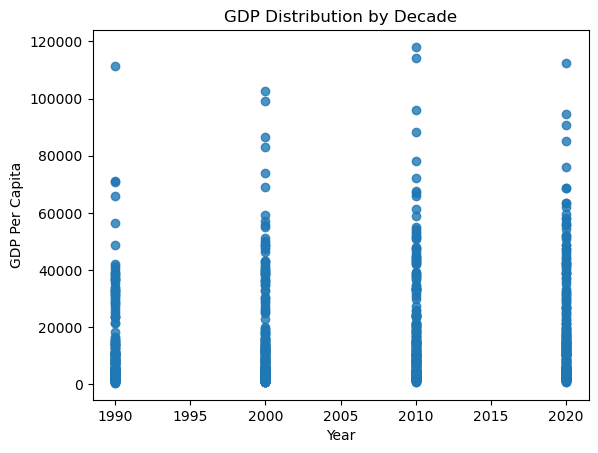

In [28]:
sns.regplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita, fit_reg=False)
plt.title('GDP Distribution by Decade')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

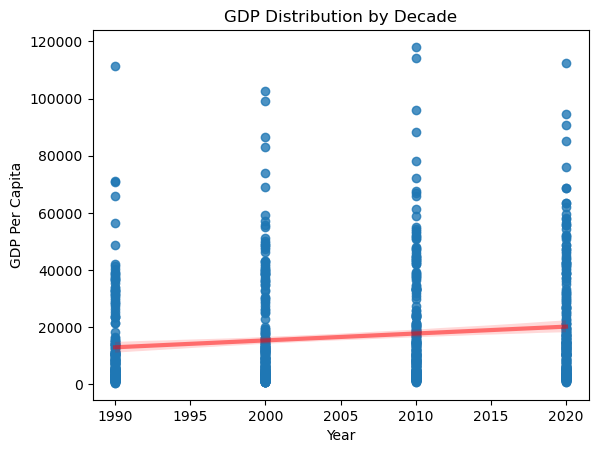

In [29]:
sns.regplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita, line_kws={"color":"r","alpha":0.5,"lw":3})
plt.title('GDP Distribution by Decade')
plt.ylabel('GDP Per Capita')

- Question 10 - Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
- Based on the charts it appears that gdp is increasing over time. the charts are all effective at showing this increase in GDP. THe scatter charts are more effective at showing the distrubiton of coutrnies over this increase while the box chart is better at showing how this increase compares with the average. See charts above

In [30]:
gdp_over100000 = gdp_df.query('GDP_Per_Capita >100000')

- Question 11 -  Which country was the first to have a GDP per capita greater than $100,000? see below

In [31]:
gdp_over100000.sort_values(by = 'Year', ascending = True).head(1) 


,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


- Question 12 Part A -  Which country had the highest GDP per capita in 2020? see below

In [32]:
gdp2020.sort_values(by = 'GDP_Per_Capita', ascending = False).head(1)

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


In [33]:
gdp2020_Luxembourg = gdp_df.query('Country == "Luxembourg"') 


- Question 12 Part B - Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. see chart below

Text(0, 0.5, 'GDP Per Capita')

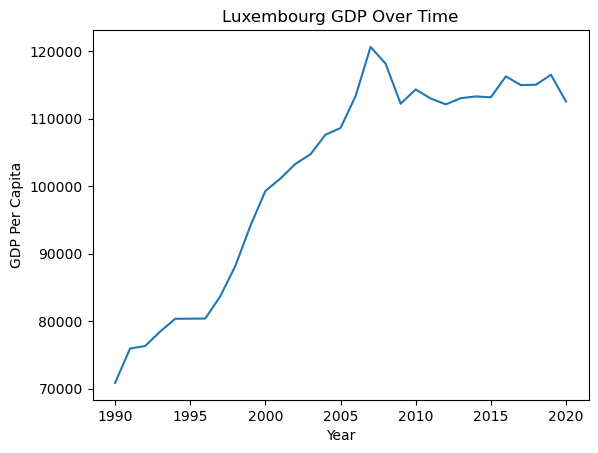

In [34]:
plt.plot(gdp2020_Luxembourg.Year, gdp2020_Luxembourg.GDP_Per_Capita)
plt.title('Luxembourg GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

- Question 13 Part A -  Which country had the lowest GDP per capita in 2020? see below

In [35]:
gdp2020.sort_values(by = 'GDP_Per_Capita', ascending = True).head(1)

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074


In [36]:
gdp2020_Burundi = gdp_df.query('Country == "Burundi"') 

- Question 13 Part B -  Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. see chart below

Text(0, 0.5, 'GDP Per Capita')

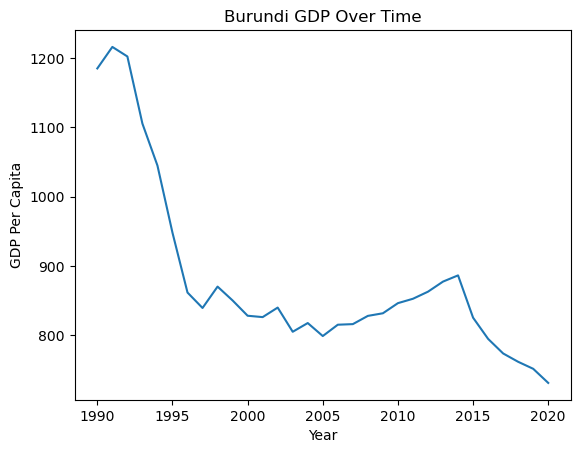

In [37]:
plt.plot(gdp2020_Burundi.Year, gdp2020_Burundi.GDP_Per_Capita)
plt.title('Burundi GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

In [38]:
# Creating a new dataframe for 1990 to compare 1990 to 2020
gdp1990 = gdp_df.query('Year == 1990')
gdp1990.reset_index(drop=True)

,Country,Year,GDP_Per_Capita
0,Africa Eastern and Southern,1990,3083.976800
1,Africa Western and Central,1990,2810.341129
2,Albania,1990,4827.034551
3,Algeria,1990,8746.340762
4,Angola,1990,5758.950488
...,...,...,...
201,Vanuatu,1990,2855.554643
202,Vietnam,1990,2066.372215
203,World,1990,9704.621768
204,Zambia,1990,2190.181724


In [39]:
gdp1990_2020 = pd.merge(gdp1990, gdp2020, 
                               on = 'Country', 
                               how = 'inner')


In [40]:
gdp1990_2020 = gdp1990_2020.rename(columns = {'Year_x': 'Year_1990', 'Year_y': 'Year_2020', 'GDP_Per_Capita_x': 'Starting_GDP', 'GDP_Per_Capita_y': 'Ending_GDP'})
gdp1990_2020

,Country,Year_1990,Starting_GDP,Year_2020,Ending_GDP
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104
1,Africa Western and Central,1990,2810.341129,2020,4021.293919
2,Albania,1990,4827.034551,2020,13253.733337
3,Algeria,1990,8746.340762,2020,10735.382539
4,Angola,1990,5758.950488,2020,6141.963839
...,...,...,...,...,...
200,Vanuatu,1990,2855.554643,2020,2878.475335
201,Vietnam,1990,2066.372215,2020,10338.270543
202,World,1990,9704.621768,2020,16269.969854
203,Zambia,1990,2190.181724,2020,3277.816510


In [41]:
# Added an additonal boolean column to the new dataframe
gdp1990_2020['GDP_increased?'] = gdp1990_2020.Starting_GDP < gdp1990_2020.Ending_GDP
gdp1990_2020

,Country,Year_1990,Starting_GDP,Year_2020,Ending_GDP,GDP_increased?
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104,True
1,Africa Western and Central,1990,2810.341129,2020,4021.293919,True
2,Albania,1990,4827.034551,2020,13253.733337,True
3,Algeria,1990,8746.340762,2020,10735.382539,True
4,Angola,1990,5758.950488,2020,6141.963839,True
...,...,...,...,...,...,...
200,Vanuatu,1990,2855.554643,2020,2878.475335,True
201,Vietnam,1990,2066.372215,2020,10338.270543,True
202,World,1990,9704.621768,2020,16269.969854,True
203,Zambia,1990,2190.181724,2020,3277.816510,True


In [42]:
# Filtering and reset of index 
filtered_gdp1990_2020 = gdp1990_2020.query('`GDP_increased?` == False').reset_index(drop=True)


- QUESTION 13 **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
    Which countries had lower GDP per capita in 2020 than in 1990? See below - of the 205 countries reported 22 showed a decrease

In [43]:
print(gdp1990_2020.shape)
filtered_gdp1990_2020

(205, 6)


,Country,Year_1990,Starting_GDP,Year_2020,Ending_GDP,GDP_increased?
0,Aruba,1990,32589.018572,2020,29563.756955,False
1,Barbados,1990,13985.829980,2020,13316.487393,False
2,Brunei,1990,71232.789430,2020,62200.882043,False
3,Burundi,1990,1184.842032,2020,731.064074,False
4,Central African Republic,1990,1201.674665,2020,937.856470,False
5,Comoros,1990,3061.328732,2020,2984.413403,False
6,Congo,1990,5068.286948,2020,3497.565454,False
7,Dem. Rep. Congo,1990,1819.723315,2020,1082.445242,False
8,Fragile and conflict affected situations,1990,4874.531032,2020,4450.512739,False
9,Gabon,1990,18179.170002,2020,14320.844646,False


In [44]:
# - Loading in internet use dataframe. Had to restrict the load it to stop after row 4497 beacuse after that is is notes.
internet_use = pd.read_csv('../data/internet_use.csv', nrows=4495)
internet_use 

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


- QUESTION 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [45]:
internet_use = internet_use.drop('Value Footnotes', axis = 1)
internet_use = internet_use.rename(columns={'Country or Area': 'Country', 'Value' : 'Internet_Users_Pct'})

- Question 16 Look at the number of observations in this dataset per year. What do you notice? See below
- Observations increased in recent years. Most likely because more countries had internet connectivity.

In [46]:
internet_use.groupby('Year').count()

,Country,Internet_Users_Pct
Year,,
1960,7,7
1965,7,7
1970,7,7
1975,7,7
1976,7,7
1977,7,7
1978,7,7
1979,7,7
1980,7,7


- QUESTION 17. What is the first year to have a non-zero internet users percentage value? See below

In [47]:
internet_use.query('Internet_Users_Pct != 0').sort_values(by = 'Year', ascending = True).head(1)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545


In [48]:
#answer is above but converted to this form to better answer question
print("Earliest year with non-zero Internet usage:", internet_use.query('Internet_Users_Pct != 0')['Year'].min())

Earliest year with non-zero Internet usage: 1990


In [49]:
internet_use.sort_values(by= 'Year')

,Country,Year,Internet_Users_Pct
1663,Grenada,1960,0.00
665,Burundi,1960,0.00
3917,Syria,1960,0.00
2558,Maldives,1960,0.00
4018,Thailand,1960,0.00
...,...,...,...
929,Costa Rica,2014,49.41
2642,Mauritius,2014,41.44
953,Cote d'Ivoire,2014,14.60
3366,Saint Kitts and Nevis,2014,65.40


In [50]:
#had to put quotes around year because of the data type
internet_use2000to2014 = internet_use[(internet_use['Year'].isin([2000, 2014]))] 
internet_use2000to2014


,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


- Question 18 How does the distribution of internet users percent differ for 2000 and 2014? See chart below. Distribution increases with year

C:\Users\nelso\AppData\Local\Temp\ipykernel_9400\453911776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet_use2000to2014['Year'] = internet_use2000to2014['Year'].astype(int)


Text(0, 0.5, 'Internet Users Pct')

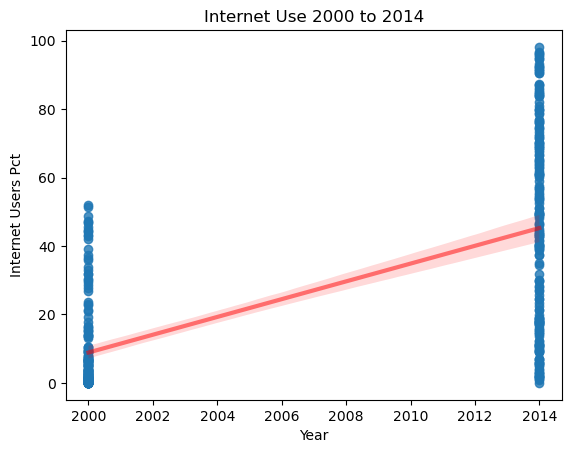

In [51]:
# had to convert data type in order to plot it
internet_use2000to2014['Year'] = internet_use2000to2014['Year'].astype(int)

sns.regplot(x=internet_use2000to2014['Year'], y=internet_use2000to2014['Internet_Users_Pct'], line_kws={"color": "r", "alpha": 0.5, "lw": 3})
plt.title('Internet Use 2000 to 2014')
plt.ylabel('Internet Users Pct')

- QUESTION 19 For how many countries was the percentage of internet users below 5% in 2014? See below

In [52]:
internet_use_under_5percent_count = internet_use.query('Year == "2014"').query('Internet_Users_Pct < 5').count()['Country']
print("Number of countries with internet usage under 5% in 2014:", internet_use_under_5percent_count)

Number of countries with internet usage under 5% in 2014: 0


In [53]:
# start of question 20. asking to merge two data frames. looking up dtype of dframes to see if they are compatible to be merged
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [54]:
internet_use.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

In [55]:
gdp_and_internet_use = pd.merge(gdp_df, internet_use, 
                               on = ('Country', 'Year'),
                               how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


In [56]:
gdp_and_internet_use.sort_values(by = ['Year', 'Country'], ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7237,Botswana,1960,NaN,0.0
7276,Burundi,1960,NaN,0.0
7608,Grenada,1960,NaN,0.0
7848,Maldives,1960,NaN,0.0
8088,Syria,1960,NaN,0.0
...,...,...,...,...
7025,Vietnam,2020,10338.270543,NaN
7056,West Bank and Gaza,2020,5402.538773,NaN
7083,World,2020,16269.969854,NaN
7114,Zambia,2020,3277.816510,NaN


- QUESTION 21. Part A Find the three countries with the highest internet users percentage in 2014. see below

In [57]:
gdp_and_internet_use.query('Year == 2014').sort_values(by = 'Internet_Users_Pct', ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.741612,98.16
645,Bermuda,2014,77361.104881,96.80
4880,Norway,2014,62390.130313,96.30


In [62]:
IBN_gdp_and_internet_use = gdp_and_internet_use[(gdp_and_internet_use['Country'].isin(["Iceland", "Bermuda", "Norway"]))] 


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994,NaN,6.794812
7671,Iceland,1993,NaN,2.667825
7672,Iceland,1992,NaN,1.539160
7673,Iceland,1991,NaN,0.505129


- QUESTION 21 PART B Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how 
the GDP per capita has changed over time for these three countries. What do you notice? see below
- Bermuda experinced a climb then drop in gdp while iceland and norway both experinced a reasonably steady climb

C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(615.5324074074074, 0.5, 'GDP_Per_Capita')

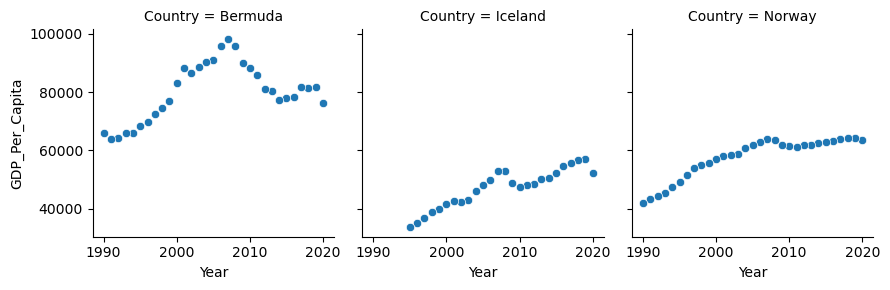

In [71]:
g=sns.FacetGrid(IBN_gdp_and_internet_use, col="Country")
g.map_dataframe(sns.scatterplot, x='Year', y='GDP_Per_Capita')





- QUESTION 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`. See below

In [76]:
gdp_and_internet_use_2014 = gdp_and_internet_use.query('Year == 2014')
gdp_and_internet_use_2014.info

<bound method DataFrame.info of                           Country  Year  GDP_Per_Capita  Internet_Users_Pct
6                     Afghanistan  2014     2102.384604                6.39
25    Africa Eastern and Southern  2014     3677.319414                 NaN
56     Africa Western and Central  2014     4215.646000                 NaN
87                        Albania  2014    11586.833878               60.10
118                       Algeria  2014    11512.690472               18.09
...                           ...   ...             ...                 ...
8147                       Turkey  2014             NaN               51.04
8170                    Venezuela  2014             NaN               57.00
8194                     Viet Nam  2014             NaN               48.31
8214        Virgin Islands (U.S.)  2014             NaN               50.07
8236                        Yemen  2014             NaN               22.55

[281 rows x 4 columns]>

- QUESTION 23.  Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them. See below. AS GDP increase so does internet use percentage. When investigating some of the unusual points, it seems like these points are island nations where internet connectivity would be harder to achieve. 

Text(0.5, 1.0, '2014 GDP Per Capita vs. Internet Users Percentage')

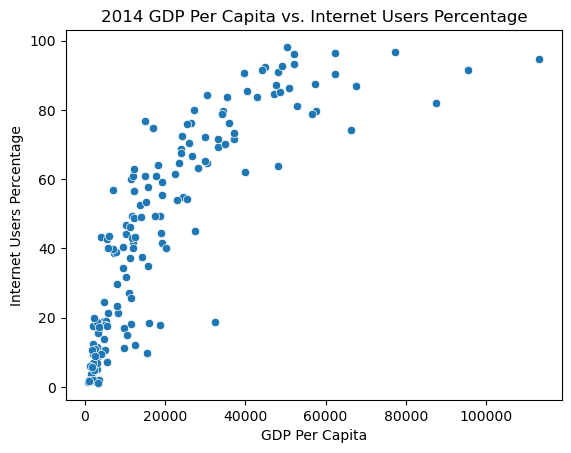

In [79]:
sns.scatterplot(data=gdp_and_internet_use_2014, x='GDP_Per_Capita', y='Internet_Users_Pct')
plt.xlabel('GDP Per Capita')
plt.ylabel('Internet Users Percentage')
plt.title('2014 GDP Per Capita vs. Internet Users Percentage')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3134,Italy,2014,39898.526461,61.96
2122,European Union,2014,39889.304716,NaN
3196,Japan,2014,39739.541124,90.58
3351,Korea,2014,37967.475618,NaN
4100,Malta,2014,37270.075592,73.17
3108,Israel,2014,37204.502608,71.45
5978,Spain,2014,35968.620137,76.19
6474,The Bahamas,2014,35847.856048,NaN
304,Aruba,2014,35405.034129,83.78
4942,Oman,2014,34875.782967,70.22
